## Analyse the class percentages

In [2]:
import SimpleITK as sitk
import os 
import numpy as np

path = '/home/cellsmb/Desktop/Dinuka/Image_Analysis/nnUnet_raw/labelsTr'

background = 0
myocardium = 0
endocardium = 0
lumen = 0
ecm = 0

folds=[[2,4,5,6],[1,2,4,5],[1,2,4,6],[1,4,5,6],[1,2,5,6]]

for file in os.listdir(path):
    if file.endswith('.nii.gz'):
        img = sitk.ReadImage(os.path.join(path, file))
        arr = sitk.GetArrayFromImage(img)
        
        back = np.sum(arr == 1)
        myo = np.sum(arr == 2)
        endo = np.sum(arr == 3)
        lum = np.sum(arr == 4)
        jelly = np.sum(arr == 5)
        total = back + myo + endo + lum + jelly
        print(f"File: {file}")
        print(f"Background: {back}, Myocardium: {myo}, Endocardium: {endo}, Lumen: {lum}, ECM: {jelly}")
        print(f"Background percentage: {back / total * 100:.2f}%")
        print(f"Myocardium percentage: {myo / total * 100:.2f}%")
        print(f"Endocardium percentage: {endo / total * 100:.2f}%")
        print(f"Lumen percentage: {lum / total * 100:.2f}%")
        print(f"ECM percentage: {jelly / total * 100:.2f}%")
        print("-" * 50+"\n")

        background += back
        myocardium += myo
        endocardium += endo
        lumen += lum
        ecm += jelly


print("Summary of Voxel Counts of all datasets (images) \n")
print(f"Background Voxels: {background}")
print(f"Myocardium Voxels: {myocardium}")
print(f"Endocardium Voxels: {endocardium}")
print(f"Lumen Voxels: {lumen}")
print(f"ECM Voxels: {ecm}")

print("\nPercentage of each class in the dataset including background:\n")
total = background + myocardium + endocardium + lumen + ecm
print(f"Total: {total}")
print(f"Background percentage: {background / (total) * 100:.2f}%")
print(f"Myocardium percentage: {myocardium / (total) * 100:.2f}%")
print(f"Endocardium percentage: {endocardium / (total) * 100:.2f}%")
print(f"Lumen percentage: {lumen / (total) * 100:.2f}%")
print(f"ECM percentage: {ecm / (total) * 100:.2f}%")

print("\nPercentage of each class in the dataset excluding background:\n")
total_excluding_background = myocardium + endocardium + lumen + ecm
print(f"Total excluding background: {total_excluding_background}")
print(f"Myocardium percentage: {myocardium / (total_excluding_background) * 100:.2f}%")
print(f"Endocardium percentage: {endocardium / (total_excluding_background) * 100:.2f}%")
print(f"Lumen percentage: {lumen / (total_excluding_background) * 100:.2f}%")
print(f"ECM percentage: {ecm / (total_excluding_background) * 100:.2f}%")


File: IF_Tr_0002.nii.gz
Background: 2353040855, Myocardium: 257281875, Endocardium: 64701412, Lumen: 189238462, ECM: 105304628
Background percentage: 79.24%
Myocardium percentage: 8.66%
Endocardium percentage: 2.18%
Lumen percentage: 6.37%
ECM percentage: 3.55%
--------------------------------------------------

File: IF_Tr_0005.nii.gz
Background: 1424216000, Myocardium: 60122321, Endocardium: 19812952, Lumen: 9942459, ECM: 58770268
Background percentage: 90.55%
Myocardium percentage: 3.82%
Endocardium percentage: 1.26%
Lumen percentage: 0.63%
ECM percentage: 3.74%
--------------------------------------------------

File: IF_Tr_0001.nii.gz
Background: 1852573105, Myocardium: 178224782, Endocardium: 33560689, Lumen: 49152361, ECM: 260465127
Background percentage: 78.04%
Myocardium percentage: 7.51%
Endocardium percentage: 1.41%
Lumen percentage: 2.07%
ECM percentage: 10.97%
--------------------------------------------------

File: IF_Tr_0004.nii.gz
Background: 1578762280, Myocardium: 94

In [3]:
import SimpleITK as sitk
import os 
import numpy as np

path = '/home/cellsmb/Desktop/Dinuka/Image_Analysis/nnUnet_raw/labelsTr'

background = 0
myocardium = 0
endocardium = 0
lumen = 0
ecm = 0

folds=[[2,4,5,3],[1,2,4,3],[1,2,3,5],[1,4,5,3],[1,2,5,4]]
voxel_dic ={}
for file in os.listdir(path):
    if file.endswith('.nii.gz'):
        img = sitk.ReadImage(os.path.join(path, file))
        arr = sitk.GetArrayFromImage(img)
        
        back = np.sum(arr == 1)
        myo = np.sum(arr == 2)
        endo = np.sum(arr == 3)
        lum = np.sum(arr == 4)
        jelly = np.sum(arr == 5)
        voxel_dic[file] = {
            "background": back,
            "myocardium": myo,
            "endocardium": endo,
            "lumen": lum,
            "ecm": jelly
        }
for fold in folds:
    back= 0
    myo = 0
    endo = 0
    lum = 0
    jelly = 0
    print(f"Fold: {fold}")
    for keys in voxel_dic.keys():
        if int(keys.split('_')[2][:-7]) in fold:
            back += voxel_dic[keys]["background"]
            myo += voxel_dic[keys]["myocardium"]
            endo += voxel_dic[keys]["endocardium"]
            lum += voxel_dic[keys]["lumen"]
            jelly += voxel_dic[keys]["ecm"]
    total = myo + endo + lum + jelly
    print(f"Background: {back}, Myocardium: {myo}, Endocardium: {endo}, Lumen: {lum}, ECM: {jelly}")
    
    print(f"Myocardium percentage: {myo / total * 100:.2f}%")
    print(f"Endocardium percentage: {endo / total * 100:.2f}%")
    print(f"Lumen percentage: {lum / total * 100:.2f}%")
    print(f"ECM percentage: {jelly / total * 100:.2f}%")

Fold: [2, 4, 5, 3]
Background: 6775054813, Myocardium: 463197093, Endocardium: 122657063, Lumen: 225892981, ECM: 273323746
Myocardium percentage: 42.69%
Endocardium percentage: 11.30%
Lumen percentage: 20.82%
ECM percentage: 25.19%
Fold: [1, 2, 4, 3]
Background: 7203411918, Myocardium: 581299554, Endocardium: 136404800, Lumen: 265102883, ECM: 475018605
Myocardium percentage: 39.87%
Endocardium percentage: 9.36%
Lumen percentage: 18.18%
ECM percentage: 32.58%
Fold: [1, 2, 3, 5]
Background: 7048865638, Myocardium: 547269519, Endocardium: 133604874, Lumen: 259248582, ECM: 458339643
Myocardium percentage: 39.13%
Endocardium percentage: 9.55%
Lumen percentage: 18.54%
ECM percentage: 32.77%
Fold: [1, 4, 5, 3]
Background: 6274587063, Myocardium: 384140000, Endocardium: 91516340, Lumen: 85806880, ECM: 428484245
Myocardium percentage: 38.80%
Endocardium percentage: 9.24%
Lumen percentage: 8.67%
ECM percentage: 43.28%
Fold: [1, 2, 5, 4]
Background: 7208592240, Myocardium: 589781334, Endocardium:

### Segmentation results plots

In [2]:
### Normalised x-axis plots for Dice and IoU through z-axis. Un-nonrmalised x-axis plots are in the matrics.py

import numpy as np
import matplotlib.pyplot as plt
import json
import os
import matplotlib as mpl

mpl.rcParams['font.family'] = 'DejaVu Serif'
mpl.rcParams['font.size'] = 12

jason_path = "/home/cellsmb/Desktop/Dinuka/Image_Analysis/Model_results/Model_results/IF_352_6img_results/all_segs_no_bg/Evaluation_summary_perslice.json"
folder_pred = "/home/cellsmb/Desktop/Dinuka/Image_Analysis/Model_results/Model_results/IF_352_6img_results/all_segs_no_bg"

with open(jason_path, 'r') as f:
    data = json.load(f)

matric_per_case = data['metric_per_case']

label_names = ['background',"Myocardium","Endocardium","Lumen","ECM"]
start_end = {'1':[23,549],'2':[0,697],'3':[21,317],'4':[30,375],'5':[13,367],'6':[19,595]}

for ID,label in enumerate([1,2,3,4,5]):
    Dice=[]
    IoU=[]
    max_length =0
    img_IDs=[]
    for imgs in matric_per_case:
        Dice.append(imgs['metrics'][str(label)]['Dice_through_z_axis'])
        IoU.append(imgs['metrics'][str(label)]['IoU_through_z_axis'])
        max_length = max(max_length,len(imgs['metrics'][str(label)]['Dice_through_z_axis']))
        img_IDs.append(imgs['reference_file'].split("/")[-1].split("_")[2].split(".")[0])
    
    fig1,ax1 = plt.subplots(figsize=(15,10), dpi = 300)
    fig2,ax2 = plt.subplots(figsize=(15,10), dpi = 300)

    for r in range(len(Dice)):
        n = len(Dice[r])
        # offset = (max_length - n) // 2
        # x = np.arange(offset, offset + n)  # center the shorter curve
        x = np.linspace(0, 1, n)  
        ax1.plot(x,Dice[r], marker='.',label=f'Image {img_IDs[r]}')
        ax1.scatter([start_end[str(int(img_IDs[r]))][0]/n, start_end[str(int(img_IDs[r]))][1]/n], \
                    [Dice[r][start_end[str(int(img_IDs[r]))][0]],Dice[r][start_end[str(int(img_IDs[r]))][1]]], color='black', s=100)
        
        ax2.plot(x,IoU[r], marker='.',label=f'Image {img_IDs[r]}')
        ax2.scatter([start_end[str(int(img_IDs[r]))][0]/n, start_end[str(int(img_IDs[r]))][1]/n], \
                    [IoU[r][start_end[str(int(img_IDs[r]))][0]],IoU[r][start_end[str(int(img_IDs[r]))][1]]], color='black', s=100)
    ax1.set_title(f'Dice through z-axis for {label_names[ID]}')
    ax1.set_xlabel('Z-axis (slices)')
    ax1.set_ylabel('Dice Score')
    ax1.legend()
    ax2.set_title(f'IoU through z-axis for {label_names[ID]}')
    ax2.set_xlabel('Z-axis (slices)')
    ax2.set_ylabel('IoU Score')
    ax2.legend()
    fig1.savefig(os.path.join(folder_pred,"Eval_plots",f'All_Dice_IoU_through_z_axis_label_{label}_normalised_x.pdf'), dpi =300)
    fig2.savefig(os.path.join(folder_pred,"Eval_plots",f'All_IoU_through_z_axis_label_{label}_normalised_x.pdf'), dpi =300)
    plt.close(fig1)
    plt.close(fig2)

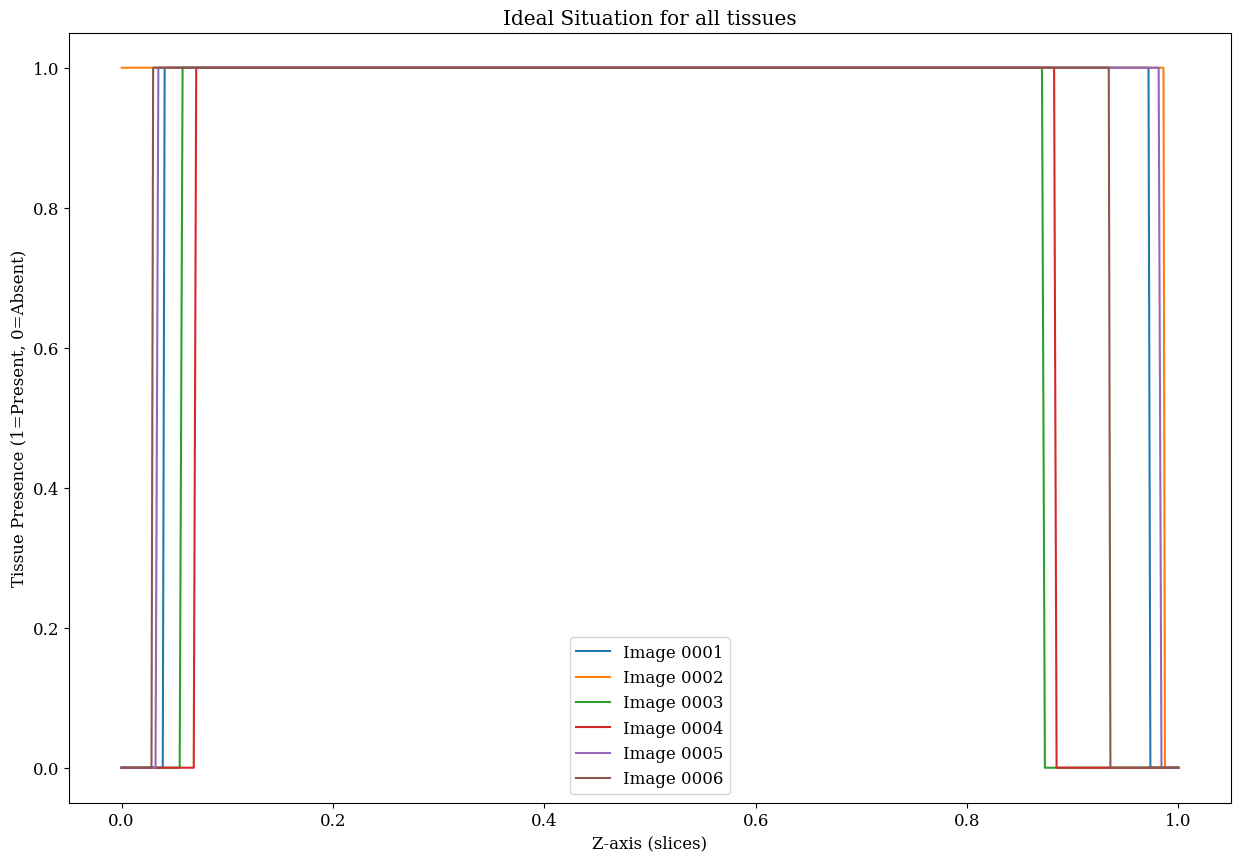

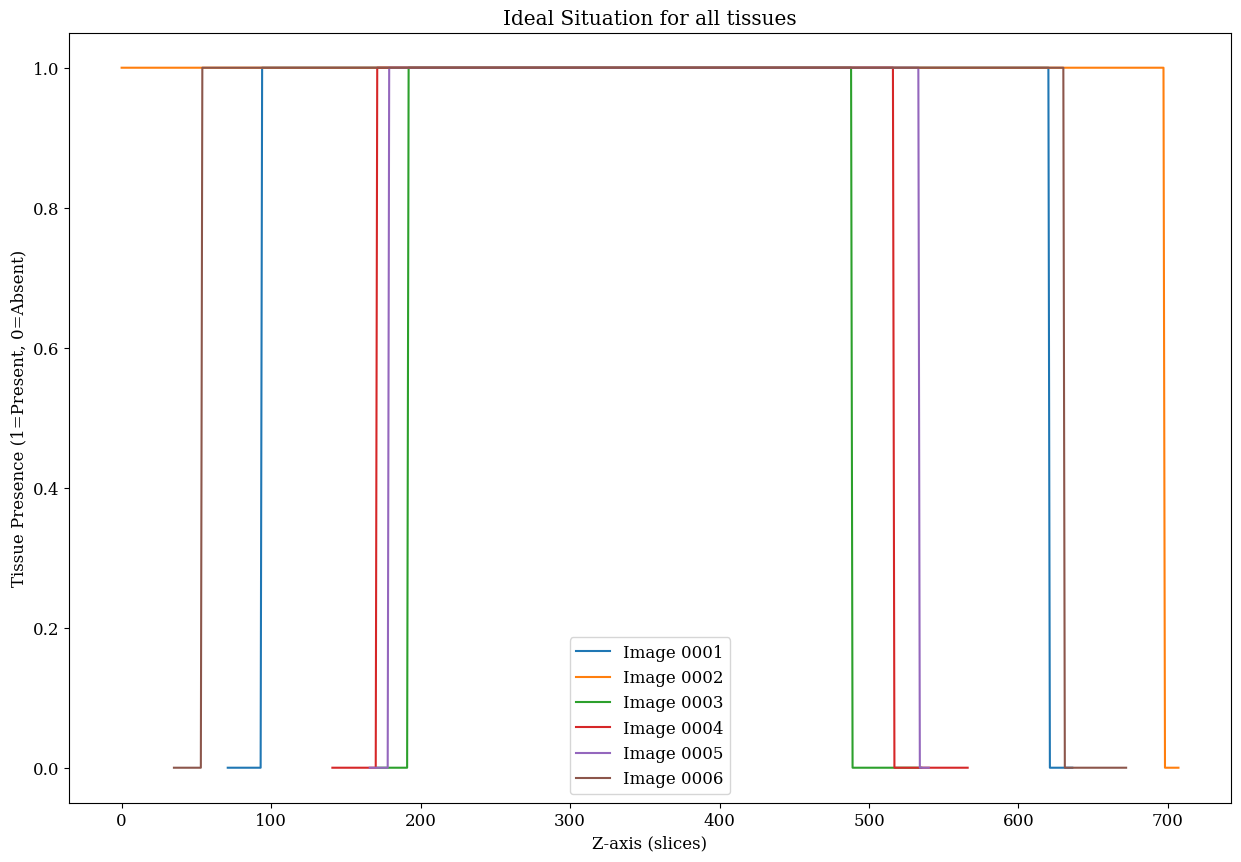

In [5]:
## IDEAL plots

import numpy as np
import matplotlib.pyplot as plt
import os
import json

folder_pred = "/home/cellsmb/Desktop/Dinuka/Image_Analysis/Model_results/Model_results/IF_352_6img_results/all_segs_bg"
label_names = ['background',"Myocardium","Endocardium","Lumen","ECM"]
start_end = {'1':[23,549],'2':[0,697],'3':[21,317],'4':[30,375],'5':[13,367],'6':[19,595]}
json_path = "/home/cellsmb/Desktop/Dinuka/Image_Analysis/Model_results/Model_results/IF_352_6img_results/all_segs_bg/Evaluation_summary_perslice.json"

with open(json_path, 'r') as f:
    results = json.load(f)['metric_per_case']


Dice=[]
img_IDs=[]
max_length=0
for imgs in results:
    Dice.append(imgs['metrics']["1"]['Dice_through_z_axis'])
    img_IDs.append(imgs['reference_file'].split("/")[-1].split("_")[2].split(".")[0])
    max_length = max(max_length, len(Dice[-1]))

fig1,ax1 = plt.subplots(figsize=(15,10))
fig2,ax2 = plt.subplots(figsize=(15,10))
for r in range(len(Dice)):
    n = len(Dice[r])
    x = np.linspace(0, 1, n)  
    y = np.zeros(n)
    start_end_values = start_end[str(int(img_IDs[r]))]
    y[start_end_values[0]:start_end_values[1]+1] = 1
    ax1.plot(x,y, label=f"Image {img_IDs[r]}")

    offset = (max_length - n) // 2
    x = np.arange(offset, offset + n)  # center the shorter curve
    ax2.plot(x,y, label=f"Image {img_IDs[r]}")

ax1.set_title('Ideal Situation for all tissues')
ax1.set_xlabel('Z-axis (slices)')
ax1.set_ylabel('Tissue Presence (1=Present, 0=Absent)')
ax1.legend()
fig1.savefig(os.path.join(folder_pred,"Eval_plots",'Ideal_plots_normalised_x.pdf'), dpi=300)

ax2.set_title('Ideal Situation for all tissues')
ax2.set_xlabel('Z-axis (slices)')
ax2.set_ylabel('Tissue Presence (1=Present, 0=Absent)')
ax2.legend()
fig2.savefig(os.path.join(folder_pred,"Eval_plots",'Ideal_plots_normalised_x.pdf'), dpi=300)

plt.show()

## Evaluation matrices analysis

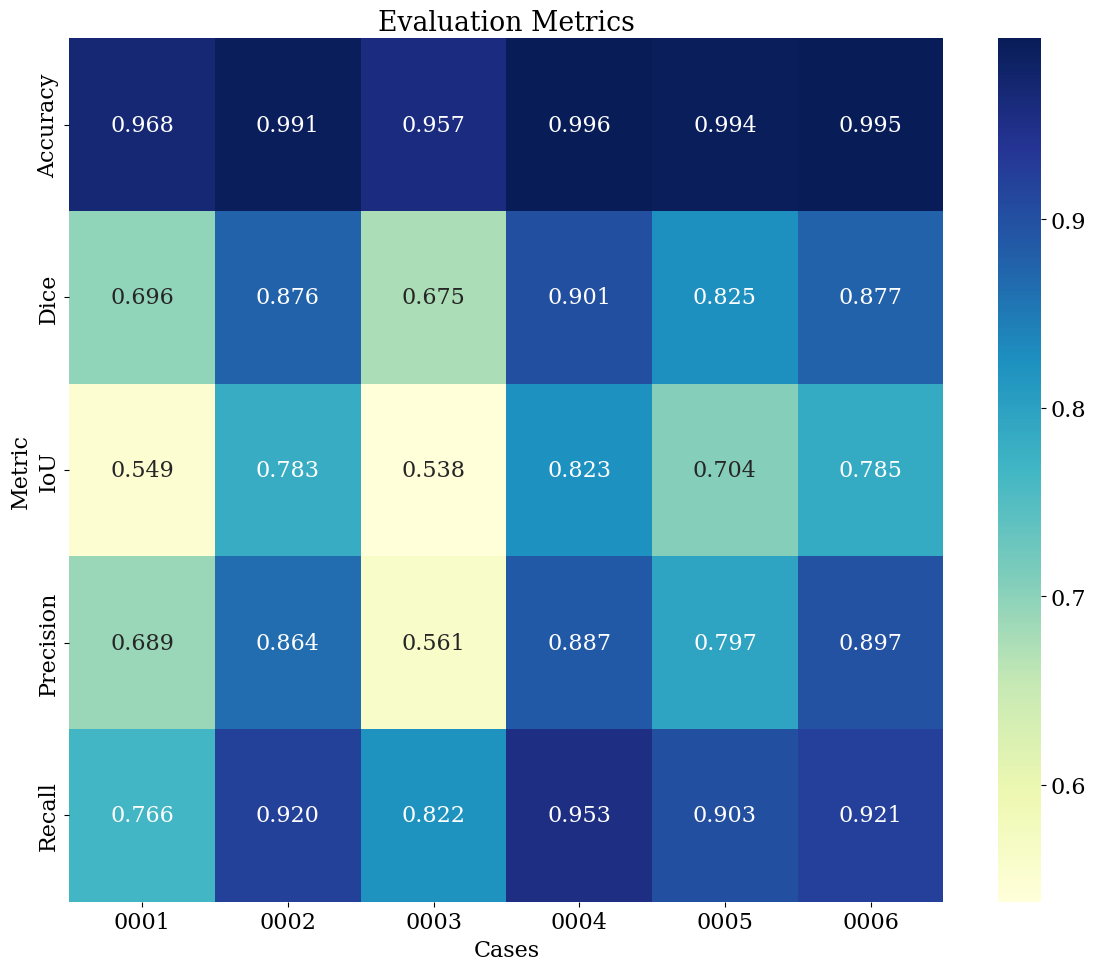

In [4]:
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'DejaVu Serif'
mpl.rcParams['font.size'] = 16

json_path = "/home/cellsmb/Desktop/Dinuka/Image_Analysis/Model_results/Model_results/IF_352_6img_results/nnUNetTrainerUMambaEncNoAMP__nnUNetPlans__3d_fullres"

class_mapping = ["Myocardium", "Endocardium", "Lumen", "ECM"]
def find_metric_heatmap(json_path, just_foreground=True, only_dice_and_iou=False):
    metrics_list = []
    case = []
    for folds in os.listdir(json_path):
        if os.path.isdir(os.path.join(json_path, folds)):
            json_file_path = os.path.join(json_path, folds, 'validation', 'summary.json')

            with open(json_file_path, 'r') as f:
                data = json.load(f)

            metric_class=data['metric_per_case']
            for r in range(len(metric_class)):
                case_id = metric_class[r]["reference_file"].split('/')[-1].split('_')[2][:-7]
                if not just_foreground:
                    for i in range(1, 5):
                        TP = metric_class[r]["metrics"][str(i)]["TP"]
                        TN = metric_class[r]["metrics"][str(i)]["TN"]
                        FP = metric_class[r]["metrics"][str(i)]["FP"]
                        FN = metric_class[r]["metrics"][str(i)]["FN"]

                        dice = metric_class[r]["metrics"][str(i)]["Dice"]
                        iou = metric_class[r]["metrics"][str(i)]["IoU"]

                        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
                        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
                        accuracy = (TP + TN) / (TP + TN + FP + FN)

                        metrics_list.append({
                            "Case": case_id,
                            "Metric": f"{class_mapping[i-1]}_Dice", "Value": dice
                        })
                        metrics_list.append({
                            "Case": case_id,
                            "Metric": f"{class_mapping[i-1]}_IoU", "Value": iou
                        })
                        if not only_dice_and_iou:
                            metrics_list.append({
                                "Case": case_id,
                                "Metric": f"{class_mapping[i-1]}_Precision", "Value": precision
                            })
                            metrics_list.append({
                                "Case": case_id,
                                "Metric": f"{class_mapping[i-1]}_Recall", "Value": recall
                            })
                            metrics_list.append({
                                "Case": case_id,
                                "Metric": f"{class_mapping[i-1]}_Accuracy", "Value": accuracy
                            })
                else:
                    TP = sum([metric_class[r]["metrics"][str(i)]["TP"] for i in range(1,5)])
                    TN = sum([metric_class[r]["metrics"][str(i)]["TN"] for i in range(1,5)])
                    FP = sum([metric_class[r]["metrics"][str(i)]["FP"] for i in range(1,5)])
                    FN = sum([metric_class[r]["metrics"][str(i)]["FN"] for i in range(1,5)])

                    dice = np.mean([metric_class[r]["metrics"][str(i)]["Dice"] for i in range(1,5)])
                    iou =  np.mean([metric_class[r]["metrics"][str(i)]["IoU"] for i in range(1,5)])

                    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
                    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
                    accuracy = (TP + TN) / (TP + TN + FP + FN)

                    metrics_list.append({
                            "Case": case_id,
                            "Metric": "Dice", "Value": dice
                        })
                    metrics_list.append({
                        "Case": case_id,
                        "Metric": "IoU", "Value": iou
                    })
                    if not only_dice_and_iou:
                        metrics_list.append({
                            "Case": case_id,
                            "Metric": "Precision", "Value": precision
                        })
                        metrics_list.append({
                            "Case": case_id,
                            "Metric": "Recall", "Value": recall
                        })
                        metrics_list.append({
                            "Case": case_id,
                            "Metric": "Accuracy", "Value": accuracy
                        })
    return metrics_list, case

metrics_list, case = find_metric_heatmap(json_path, just_foreground=True, only_dice_and_iou=False)
df = pd.DataFrame(metrics_list)

# Pivot: rows = metrics, cols = cases, values = Value
df_pivot = df.pivot(index="Metric", columns="Case", values="Value")

# Sort columns
df_pivot = df_pivot.sort_index(axis=1)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.ylabel("Metric")
plt.xlabel("Cases")
plt.title("Evaluation Metrics")
plt.tight_layout()
plt.savefig(os.path.join(json_path, 'Evaluation_Metrics_Heatmap_with_bg.pdf'), dpi=300)
plt.show()

## Heart Size

In [ ]:
import numpy as np
from skimage import measure
from math import pi
import nibabel as nib   

def compute_heart_size(mask, spacings, spacings_unit='mm'):
    sx, sy, sz = map(float, spacings)
    # Convert spacings to micrometres
    if spacings_unit == 'mm':
        sx_um, sy_um, sz_um = sx * 1000, sy * 1000, sz * 1000
    elif spacings_unit in ('um', 'µm'):
        sx_um, sy_um, sz_um = sx, sy, sz
    else:
        raise ValueError("spacings_unit must be 'mm' or 'um'")

    voxel_count = int(mask.sum())
    voxel_volume_um3 = sx_um * sy_um * sz_um
    volume_um3 = voxel_count * voxel_volume_um3
    volume_mm3 = volume_um3 / 1e9

    # --- Bounding box ---
    coords = np.argwhere(mask)
    xmin, ymin, zmin = coords.min(axis=0)
    xmax, ymax, zmax = coords.max(axis=0)
    bbox_coords = (xmin, xmax, ymin, ymax, zmin, zmax)


    # shape in voxels
    nz = (zmax - zmin + 1)
    ny = (ymax - ymin + 1)
    nx = (xmax - xmin + 1)
    bbox_shape_vox = (nx, ny, nz)
    # physical extents in µm
    extent_z_um = nz * sz_um
    extent_y_um = ny * sy_um
    extent_x_um = nx * sx_um
    bbox_size_um = (extent_x_um, extent_y_um, extent_z_um)

    # Equivalent shapes
    cube_side_um = (volume_um3) ** (1/3)
    sphere_diameter_um = ((6 * volume_um3 / pi) ** (1/3))

    # Surface area
    if voxel_count > 0:
        padded = np.pad(mask.astype(np.uint8), 1)
        verts, faces, _, _ = measure.marching_cubes(padded, 0.5)
        verts_um = np.empty_like(verts)
        verts_um[:, 0] = (verts[:, 0] - 1) * sz_um
        verts_um[:, 1] = (verts[:, 1] - 1) * sy_um
        verts_um[:, 2] = (verts[:, 2] - 1) * sx_um
        tris = verts_um[faces]
        v0 = tris[:, 1, :] - tris[:, 0, :]
        v1 = tris[:, 2, :] - tris[:, 0, :]
        tri_areas = 0.5 * np.linalg.norm(np.cross(v0, v1), axis=1)
        surface_area_um2 = tri_areas.sum()
    else:
        surface_area_um2 = 0.0

    return {
        'voxel_count': voxel_count,
        'volume_um3': volume_um3,
        'volume_mm3': volume_mm3,
        'voxel_volume_um3': voxel_volume_um3,
        'bbox_coords_vox': bbox_coords,
        'bbox_shape_vox': bbox_shape_vox,
        'bbox_size_um': bbox_size_um,
        'cube_side_um': cube_side_um,
        'equivalent_sphere_diameter_um': sphere_diameter_um,
        'surface_area_um2': surface_area_um2
    }

# Example usage:
# If you have a NIfTI segmentation (labels), and your tissue label is e.g. 1:
nifti = nib.load("/home/cellsmb/Desktop/Dinuka/Image_Analysis/New_IF_Dataset/New datasets/E9.5/All-regions21_040d.nii")
seg = nifti.get_fdata().astype(np.uint8)
mask = (seg > 1)
spacings = nifti.header.get_zooms()[:3]   # typically in mm
# results = compute_heart_size(mask, spacings, spacings_unit='um')
print(spacings)
# bbox = (np.int64(10), np.int64(1966), np.int64(180), np.int64(1579), np.int64(0), np.int64(697))

(np.float32(0.36), np.float32(0.36), np.float32(1.0))


In [1]:
import napari
import numpy as np
import nibabel as nib

# Load your mask
nifti=nib.load("/home/cellsmb/Desktop/Dinuka/Image_Analysis/New_IF_Dataset/New datasets/E9.5/All-regions21_040d.nii")
seg = nifti.get_fdata().astype(np.uint8)
mask = (seg > 1)
# coords = np.argwhere(mask)
# xmin, ymin, zmin = coords.min(axis=0)
# xmax, ymax, zmax = coords.max(axis=0)

# # Prepare bounding box vertices (8 corners)
# bbox_vertices = np.array([
#     [zmin, ymin, xmin],
#     [zmin, ymin, xmax],
#     [zmin, ymax, xmin],
#     [zmin, ymax, xmax],
#     [zmax, ymin, xmin],
#     [zmax, ymin, xmax],
#     [zmax, ymax, xmin],
#     [zmax, ymax, xmax],
# ])

# Define the 12 edges as line segments between corners
edges = np.array([
    [0, 1], [0, 2], [1, 3], [2, 3],  # bottom face
    [4, 5], [4, 6], [5, 7], [6, 7],  # top face
    [0, 4], [1, 5], [2, 6], [3, 7],  # vertical edges
])

# Create Napari viewer
viewer = napari.Viewer()
viewer.add_image(mask)

# Add the box as a Shapes layer (type='path' for wireframe)
# for e in edges:
#     viewer.add_shapes(
#         [bbox_vertices[e]],
#         shape_type='path',
#         edge_color='red',
#         edge_width=2,
#         name='bbox'
#     )

napari.run()


In [3]:
y =(1582-180)*0.36
x= (1964-9)*0.36  

print(y,x)


504.71999999999997 703.8


In [ ]:
print(results['bbox_coords_vox'])   
print(results['bbox_shape_vox'])   
print(results['bbox_size_um']) 

(np.int64(10), np.int64(1966), np.int64(180), np.int64(1579), np.int64(0), np.int64(697))
(np.int64(1957), np.int64(1400), np.int64(698))
(np.float64(704.5200279951096), np.float64(504.00002002716064), np.float64(698.0))


## Image Intensity analysis

In [6]:
## For over slices
from importlib.metadata import files
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

# Set global font to DejaVu Serif
mpl.rcParams['font.family'] = 'DejaVu Serif'

folder = "/home/cellsmb/Desktop/Dinuka/Image_Analysis/New_IF_Dataset/IFTest/IFTest"
destination = "/home/cellsmb/Desktop/Dinuka/Image_Analysis/Intensity_plots/testing"
segmentation_folder = None#"/home/cellsmb/Desktop/Dinuka/Image_Analysis/nnUnet_raw/labelsTr"

file_List=os.listdir(folder)
file_List.sort()
already_done = []

def read_file(file):
    global already_done
    img_arrays = []
    if file.endswith('.nii.gz'):
        if file.split("_")[2] not in already_done:
            for r in range(3):
                img_path = os.path.join(folder,f"IF_Tr_{file.split('_')[2]}_{r:04d}.nii.gz")
                img = nib.load(img_path)
                arr = img.get_fdata().astype(np.uint8)
                img_arrays.append(arr)
        already_done.append(file.split("_")[2])
    return img_arrays
        

def plot_intensity_profiles(images, files, volume:bool=False,seg:bool=False):
    image_type = {"0000":"Endocardium","0001":"Myocardium","0002":"Nuclei"}
    if volume:
        value_dict = {"0":{'mean':[], 'std':[]}, "1":{'mean':[], 'std':[]}, "2":{'mean':[], 'std':[]}}
        fig, ax =plt.subplots(1,3, figsize=(15,5))
        for file in images:
            arrs = read_file(file)
            if arrs:
                if seg:
                    seg_arr = nib.load(os.path.join(segmentation_folder,f"IF_Tr_{file.split('_')[2]}.nii.gz"))
                    seg_arr = seg_arr.get_fdata().astype(np.uint8)
                    foreground_mask = seg_arr > 0
                    for r in range(3):
                        arr = arrs[r] * foreground_mask
                        new = np.where(arr>0,arr,np.nan)
                        mean = np.nanmean(new)
                        std = np.nanstd(new)
                        value_dict[f"{r}"]['mean'].append(mean)
                        value_dict[f"{r}"]['std'].append(std)
                else:
                    for r in range(3):
                        mean = np.mean(arrs[r])
                        std = np.std(arrs[r])
                        value_dict[f"{r}"]['mean'].append(mean)
                        value_dict[f"{r}"]['std'].append(std)
        #candle ticks for the mean and std
        for r in range(3):
            ax[r].errorbar(np.arange(len(value_dict[f"{r}"]['mean'])), value_dict[f"{r}"]['mean'], yerr=value_dict[f"{r}"]['std'], label=image_type[f"{r:04d}"], capsize=5)
            ax[r].set_title(f"{image_type[f'{r:04d}']}", fontsize=14)
            ax[r].set_xlabel("Image Index", fontsize=14)
            ax[r].set_ylabel("Intensity", fontsize=14)
            ax[r].grid()
        plt.tight_layout()
        plt.show()
        fig.savefig(os.path.join(destination,f"Intensity_plot_Volume.pdf"), dpi=300)
        plt.close()

    else:
        fig, ax = plt.subplots(3,3, figsize=(15,15))

        for r in range(3):
            planes = {"XY": images[0].shape[2],"XZ": images[0].shape[1],"YZ": images[0].shape[0]}
            for c,key in enumerate(planes.keys()):                    
                reshaped = images[r].reshape(-1, planes[key])
                if seg:
                    new = np.where(reshaped>0,reshaped,np.nan)
                    mean = np.nanmean(new, axis=0)
                    std = np.nanstd(new, axis=0)
                    mean  = np.nan_to_num(mean, nan =0.0)
                    std = np.nan_to_num(std, nan=0.0)
                else:
                    mean = np.mean(reshaped, axis=0)
                    std = np.std(reshaped, axis=0)
                ax[r, c].plot(mean,label="Mean intensity",color='blue')
                ax[r, c].fill_between(range(len(mean)), mean - std, mean + std, color='blue', alpha=0.2,label='±1 Std Dev')
                ax[r, c].grid()
                if r == 0:
                    ax[r, c].set_title(f"{key} plane", fontsize=14)
            ax[r, 0].set_ylabel(image_type[f"{r:04d}"], fontsize=14)
        ax[2, 0].set_xlabel("Z depth", fontsize=14)
        ax[2, 1].set_xlabel("Y depth", fontsize=14)
        ax[2, 2].set_xlabel("X depth", fontsize=14)
        # fig.text(0.04, 0.5, "Intensity", va="center", rotation="vertical", fontsize=14)

        # Shared legend
        handles, labels = ax[0, 0].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper right", fontsize=12)

        # Super title
        fig.suptitle(f"Mean Intensity Profiles Across Planes of {files.split('_')[2]}", fontsize=16, fontweight="bold")

        plt.tight_layout(rect=[0, 0, 0.9, 0.95])
        plt.show()
        fig.savefig(os.path.join(destination,f"Intensity_plot_{files.split('_')[2]}.pdf"), dpi=300)
        plt.close()

def intensity_profiles(volume:bool=False, only_foreground:bool=False):

    if not only_foreground and not volume:
        for file in file_List:
            arrs = read_file(file)
            if arrs:
                plot_intensity_profiles(arrs, files=file, volume=volume)

    elif volume and not only_foreground:
        plot_intensity_profiles(file_List, file_List, volume=volume)

    elif not volume and only_foreground:
        if segmentation_folder is None:
            raise ValueError("Segmentation folder must be provided when only_foreground is True.")
        else:
            for file in file_List:
                arrs = read_file(file)
                seg_arr = nib.load(os.path.join(segmentation_folder,f"IF_Tr_{file.split('_')[2]}.nii.gz"))
                seg_arr = seg_arr.get_fdata().astype(np.uint8)
                foreground_mask = seg_arr > 0
                if arrs:
                    for idx, arr in enumerate(arrs):
                        arrs[idx] = arr * foreground_mask
                    plot_intensity_profiles(arrs, files=file, volume=volume,seg=True)
    else:
        if segmentation_folder is None:
            raise ValueError("Segmentation folder must be provided when only_foreground is True.")
        else:
            plot_intensity_profiles(file_List, file_List, volume=volume,seg=True)

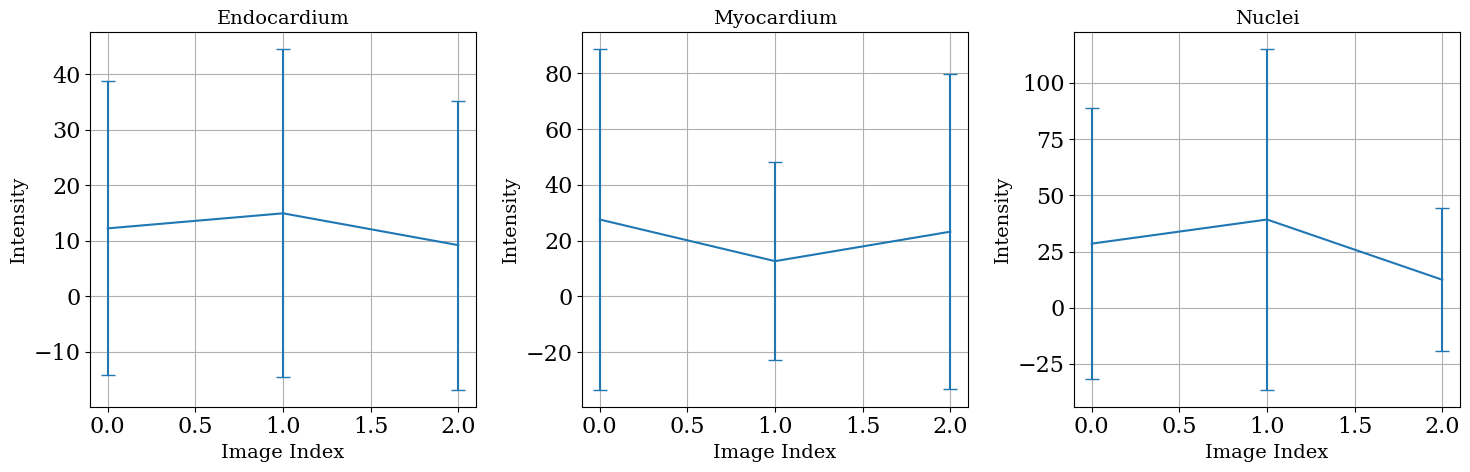

In [7]:
intensity_profiles(volume=True, only_foreground=False)

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import exposure

folder_path = "/home/cellsmb/Desktop/Dinuka/Image_Analysis/nnUnet_raw/imagesTr"

def Read_image(img_number:int) -> list:

    channels =[]
    n=0

    while True:
        if os.path.isfile(os.path.join(folder_path,"IF_Tr_%04d_%04d"%(img_number,n)+".nii.gz")):
            img_path = os.path.join(folder_path,"IF_Tr_%04d_%04d"%(img_number,n)+".nii.gz")
            img = nib.load(img_path)
            data = img.get_fdata().astype(np.uint8)
            channels.append(data)
        else:
            break
        n+=1
    print("Number of channels read:", len(channels))
    return channels

In [ ]:
def pooled_intensities(channels_list, max_voxels=5_000_000, threshold_min=None, threshold_max=None):
    rng = np.random.default_rng(0)
    samples = []
    for ch in channels_list:
        ch = np.array(ch)
        x = ch.ravel()
        if threshold_min is not None: x = x[x >= threshold_min]
        if threshold_max is not None: x = x[x <= threshold_max]
        if x.size > 0:
            if x.size > max_voxels:
                idx = rng.choice(x.size, size=max_voxels, replace=False)
                x = x[idx]
            samples.append(x.astype(np.uint8))
    if not samples:
        raise ValueError("No data collected for pooled intensities.")
    return np.concatenate(samples)

from skimage.filters import threshold_otsu, threshold_yen, threshold_triangle, threshold_isodata, threshold_li

def thresholds_from_hist_methods(intensities):
    return {
        "otsu": threshold_otsu(intensities),
        "yen": threshold_yen(intensities),
        "triangle": threshold_triangle(intensities),
        "isodata": threshold_isodata(intensities),
        "li": threshold_li(intensities)
    }

from sklearn.mixture import GaussianMixture

def gmm_bayes_threshold(intensities, n_components=2):
    x = intensities.reshape(-1,1)
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(x)
    w = gmm.weights_
    m = gmm.means_.ravel()
    s2 = np.array([c for c in gmm.covariances_]).reshape(-1)  # variances
    # Solve w1 N(x|m1,s1) = w2 N(x|m2,s2); quadratic in x
    a = 1/(2*s2[1]) - 1/(2*s2[0])
    b = m[0]/s2[0] - m[1]/s2[1]
    c = (m[1]**2)/(2*s2[1]) - (m[0]**2)/(2*s2[0]) + np.log((w[1]*np.sqrt(s2[0]))/(w[0]*np.sqrt(s2[1])))
    # Handle equal-variance (a≈0) gracefully
    if abs(a) < 1e-12:
        t = -c/b
        return float(t)
    roots = np.roots([a,b,c])
    # pick root between the means (if possible) or closest to them
    t_candidates = [r.real for r in roots if abs(r.imag) < 1e-6]
    if len(t_candidates)==2:
        lo, hi = min(m), max(m)
        between = [t for t in t_candidates if lo<=t<=hi]
        return float(between[0] if between else t_candidates[np.argmin([abs(t-lo)+abs(t-hi) for t in t_candidates])])
    return float(t_candidates[0])

import numpy as np
from sklearn.mixture import GaussianMixture

def gmm_bayes_threshold_1d(intensities, n_components=2,
                           covariance_type='diag',  # 'diag' is simpler/robuster for 1-D
                           reg_covar=1e-6,
                           random_state=0):
    """
    Return the Bayes decision boundary (equal posterior) between two GMM components.
    Works for 1-D intensities. Falls back to a numeric grid search if needed.
    """
    x = np.asarray(intensities, dtype=np.float64).reshape(-1, 1)
    if x.size == 0:
        raise ValueError("Empty intensity array.")
    x = x[np.isfinite(x).ravel()]  # drop NaNs/Infs
    x = x.reshape(-1, 1)

    # Fit GMM
    gmm = GaussianMixture(n_components=n_components,
                          covariance_type=covariance_type,
                          reg_covar=reg_covar,
                          random_state=random_state)
    gmm.fit(x)

    if n_components != 2:
        raise ValueError("This function expects n_components=2 for a single threshold.")

    w = gmm.weights_
    m = gmm.means_.ravel()

    # Extract variances per component depending on covariance_type
    if covariance_type == 'full':
        # shape: (n_components, 1, 1) for 1-D -> take [0,0]
        s2 = np.array([c[0, 0] for c in gmm.covariances_])
    elif covariance_type == 'tied':
        # shape: (1,1) for 1-D -> same var for both comps
        s2 = np.array([gmm.covariances_[0, 0], gmm.covariances_[0, 0]])
    elif covariance_type == 'diag':
        # shape: (n_components, 1) -> ravel to (n_components,)
        s2 = gmm.covariances_.ravel()
    elif covariance_type == 'spherical':
        # shape: (n_components,) already variances
        s2 = gmm.covariances_.ravel()
    else:
        raise ValueError(f"Unsupported covariance_type: {covariance_type}")

    # Sort components by mean so "0" is the darker/background mode
    order = np.argsort(m)
    w, m, s2 = w[order], m[order], s2[order]

    # --- Analytic solution of w1*N(x|m1,s1) = w2*N(x|m2,s2) ---
    # Quadratic: a x^2 + b x + c = 0
    a = 1.0/(2.0*s2[1]) - 1.0/(2.0*s2[0])
    b = m[0]/s2[0] - m[1]/s2[1]
    c = (m[1]**2)/(2.0*s2[1]) - (m[0]**2)/(2.0*s2[0]) + np.log((w[1]*np.sqrt(s2[0]))/(w[0]*np.sqrt(s2[1])))

    t = None
    lo, hi = m[0], m[1]

    try:
        if abs(a) < 1e-14:
            # Equal-variance case -> linear solution
            t = -c / b
        else:
            roots = np.roots([a, b, c])
            roots = [r.real for r in roots if np.isreal(r)]
            # Prefer the root between the means; otherwise the closest to their midpoint
            if roots:
                between = [r for r in roots if lo <= r <= hi]
                t = between[0] if between else min(roots, key=lambda r: abs(r - (lo + hi)/2.0))
    except Exception:
        t = None

    # --- Numeric fallback (no SciPy): equal posterior on a dense grid ---
    if t is None or not np.isfinite(t):
        gmin = np.percentile(x, 0.1)
        gmax = np.percentile(x, 99.9)
        grid = np.linspace(gmin, gmax, 4096).reshape(-1, 1)
        resp = gmm.predict_proba(grid)  # responsibilities per component
        # find where |p0 - p1| is minimal
        idx = int(np.argmin(np.abs(resp[:, 0] - resp[:, 1])))
        t = float(grid[idx, 0])

    return float(t)


def robust_bg_threshold(intensities_bg, alpha=1e-3):
    # Gaussian tail ⇒ k = Φ^{-1}(1-α)
    from scipy.stats import norm
    k = norm.ppf(1 - alpha)  # e.g., α=1e-3 → k≈3.09
    mu = np.mean(intensities_bg)
    sigma = np.std(intensities_bg, ddof=1)
    return float(mu + k*sigma)

def robust_bg_threshold_mad(intensities_bg, alpha=1e-3):
    from scipy.stats import norm
    k = norm.ppf(1 - alpha)
    med = np.median(intensities_bg)
    mad = np.median(np.abs(intensities_bg - med))
    sigma_hat = 1.4826 * mad
    return float(med + k*sigma_hat)


In [4]:
def read_all_images():
    img_numbers= [1,2,3,4,5,6]
    all_images = []
    for num in img_numbers:
        channels = Read_image(num)
        all_images.extend(channels)
    return all_images


In [5]:
all_images = read_all_images()

Number of channels read: 3
Number of channels read: 3
Number of channels read: 3
Number of channels read: 3
Number of channels read: 3
Number of channels read: 3


In [5]:
pooled = pooled_intensities(all_images, max_voxels=10_000_000)

In [6]:
taus = thresholds_from_hist_methods(pooled)
tau_otsu = taus["otsu"]
tau_yen = taus["yen"]
tau_triangle = taus["triangle"]

# or GMM:
tau_gmm = gmm_bayes_threshold_1d(pooled,covariance_type='diag')

# or background-anchored (need background samples):
# bg = pooled_from_background_rois(...)
# tau_bg = robust_bg_threshold(bg, alpha=1e-3)

# 4) choose one τ (example: τ = tau_yen)
tau = tau_yen


In [7]:
taus

{'otsu': 111,
 'yen': 11,
 'triangle': 8,
 'isodata': 111,
 'li': 42.39745011937387}

In [8]:
tau_gmm, tau

(5.043956043956044, 11)

In [ ]:
channel_name = ["Endocardium", "Myocardium", "Nuclei"]
def plot_histogram(channels: list, threshold:int=50):
    flattened_channels = [ch.flatten()[ch.flatten() > threshold] for ch in channels]
    fig, axs = plt.subplots(len(flattened_channels), 1, figsize=(10, 6))

    for i, ax in enumerate(axs):
        ax.hist(flattened_channels[i], bins=256-threshold-1, alpha=0.7)
        ax.set_title(channel_name[i])

    plt.tight_layout()
    plt.show()

In [ ]:
plot_histogram(Read_image(1),0)

In [10]:
def maybe_mkdir(folder_name:str)->str:
    if not os.path.exists(os.path.join(folder_path, folder_name)):
        os.makedirs(os.path.join(folder_path, folder_name))

def recreate_img(img_number: int, threshold:int):
    maybe_mkdir(f"Thresholded_{threshold}")
    n=0
    while True:
        if os.path.isfile(os.path.join(folder_path,"IF_Tr_%04d_%04d"%(img_number,n)+".nii.gz")):
            img_path = os.path.join(folder_path,"IF_Tr_%04d_%04d"%(img_number,n)+".nii.gz")
            img = nib.load(img_path)
            data = img.get_fdata().astype(np.uint8)
            data[data < threshold] = 0
            data = nib.Nifti1Image(data, img.affine, img.header)
            nib.save(data, os.path.join(folder_path, f"Thresholded_{threshold}", 
                                        "IF_Tr_%04d_%04d"%(img_number,n)+".nii.gz"))

        else:
            break
        n+=1

In [ ]:
recreate_img(1,43)

In [3]:
def histogram_equalization(channels: list, method:str="global"):
    equalized_channels = []
    for ch in channels:
        # flatten -> equalize -> reshape back
        if method == "global":
            eq = exposure.equalize_hist(ch)  # global hist eq (range [0,1])
        elif method == "clahe":
            eq = exposure.equalize_adapthist(ch, clip_limit=0.03)  # CLAHE
        else:
            raise ValueError("Method must be 'global' or 'clahe'")
        equalized_channels.append(eq)
    return equalized_channels

In [ ]:
channels = Read_image(1)

# Plot original histogram
# plot_histogram(channels, -1)

# Apply histogram equalization
eq_channels = histogram_equalization(channels, method="global")  # try "global" or "clahe"

# Plot equalized histogram
plot_histogram(eq_channels, -1)


Number of channels read: 3
